<a href="https://colab.research.google.com/github/egioia92/Machine-Learning/blob/main/Machine_Learning_I/Machine_Learning_1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning 1 Assignment

BACKGROUND:

The data is a marketing campaign data of a skin care clinic associated with its success.

Description of variables-

Success: Response to marketing campaign of Skin Care Clinic which offers both products and services. (1: email Opened, 0: email not opened)

- AGE: Age Group of Customer

- Recency_Service: Number of days since last service purchase

- Recency_Product: Number of days since last product purchase

- Bill_Service: Total bill amount for service in last 3 months

- Bill_Product: Total bill amount for products in last 3 months

- Gender (1: Male, 2: Female)

Note: Answer following questions using entire data and do not create test data.

QUESTIONS

1. Import Email Campaign data.

2. Perform binary logistic regression to model “Success”.

3. Interpret sign of each significant variable in the model.                                                       

4. Compare performance of Binary Logistic Regression (significant variables) and
Naïve Bayes Method (all variables) using area under the ROC curve.

5. Implement binary logistic regression and Support Vector Machines by combining service and product variables.

## Import Libraries

In [384]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
#BLR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
#NB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
#svm
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Import Email Campaign data

In [385]:
data = pd.read_csv("/content/Email Campaign ML.csv")
data.head()

,SN,Gender,AGE,Recency_Service,Recency_Product,Bill_Service,Bill_Product,Success
0,1,1,<=45,12,11,11.82,2.68,0
1,2,2,<=30,6,0,10.31,1.32,0
2,3,1,<=30,1,9,7.43,0.49,0
3,4,1,<=45,2,14,13.68,1.85,0
4,5,2,<=30,0,11,4.56,1.01,1


In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SN               683 non-null    int64  
 1   Gender           683 non-null    int64  
 2   AGE              683 non-null    object 
 3   Recency_Service  683 non-null    int64  
 4   Recency_Product  683 non-null    int64  
 5   Bill_Service     683 non-null    float64
 6   Bill_Product     683 non-null    float64
 7   Success          683 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 42.8+ KB


In [387]:
# Converting data types
data['Gender'] = data['Gender'].astype('category')
data['AGE'] = data['AGE'].astype('category')
#data['Success'] = data['Success'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   SN               683 non-null    int64   
 1   Gender           683 non-null    category
 2   AGE              683 non-null    category
 3   Recency_Service  683 non-null    int64   
 4   Recency_Product  683 non-null    int64   
 5   Bill_Service     683 non-null    float64 
 6   Bill_Product     683 non-null    float64 
 7   Success          683 non-null    int64   
dtypes: category(2), float64(2), int64(4)
memory usage: 33.7 KB


## Perform binary logistic regression to model “Success”

In [388]:
# Define the features and target variable
x_var_lr = ['Recency_Service', 'Recency_Product', 'Bill_Service', 'Bill_Product', 'Gender', 'AGE']

y = data['Success']
X_lr = data[x_var_lr]

# Convert categorical variables into dummy variables
X_lr_encoded = pd.get_dummies(X_lr, columns=['Gender', 'AGE'], drop_first=True)
X_lr_encoded = X_lr_encoded.rename( columns = {'AGE_<=45': 'AGE_lqe_45', 'AGE_<=55': 'AGE_lqe_55'} )

# Split the data into training and testing sets
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr_encoded, y, test_size=0.2, random_state=42)

### Perform binary logistic regression : logit()

In [389]:
# Use all variables
lr_logit_m = smf.logit(formula='Success ~ Recency_Service + Recency_Product + Bill_Service + Bill_Product + Gender_2 + AGE_lqe_45 + AGE_lqe_55',
                  data=X_lr_train.join(y_lr_train)).fit()

# Print significant variables
significant_vars = lr_logit_m.pvalues[lr_logit_m.pvalues < 0.05].index
print(significant_vars)

Optimization terminated successfully.
         Current function value: 0.387449
         Iterations 7
Index(['Intercept', 'Recency_Service', 'Recency_Product', 'Bill_Service',
       'Bill_Product'],
      dtype='object')


In [390]:
# Remove non significant variables
lr_logit_m1 = smf.logit(formula='Success ~ Recency_Service + Recency_Product + Bill_Service + Bill_Product',
                  data=X_lr_train.join(y_lr_train)).fit()

lr_logit_m1.summary()

Optimization terminated successfully.
         Current function value: 0.390713
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                  546
Model:                          Logit   Df Residuals:                      541
Method:                           MLE   Df Model:                            4
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                  0.3250
Time:                        19:54:47   Log-Likelihood:                -213.33
converged:                       True   LL-Null:                       -316.03
Covariance Type:            nonrobust   LLR p-value:                 2.603e-43
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.1879      0.279     -4.261      0.000      -1.734      -0.642
Recency_Service    -0.2448      0.032     -7.692      0.000      -0.307      -0.182
Recency_Product    -0.0863      0.023     -3.830      0.000      -0.130      -0.042
Bill_Service        0.0950      0.021      4.559      0.000       0.054       0.136
Bill_Product        0.5801      0.095      6.102      0.000       0.394       0.766
===================================================================================
"""

In [391]:
lr_pred_values = lr_logit_m1.predict(X_lr_test)

lr_pred_class=np.zeros(lr_pred_values.shape)
lr_pred_class[lr_pred_values>0.2]=1

from sklearn.metrics import classification_report
print(classification_report(y_lr_test,lr_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78       102
           1       0.45      0.71      0.56        35

    accuracy                           0.71       137
   macro avg       0.67      0.71      0.67       137
weighted avg       0.77      0.71      0.72       137



### Perform binary logistic regression : LogisticRegression

In [392]:
# When you are using LogisticRegression from scikit,
# it is recommended to standardize X variables to avoid the problem of non-convergence (which is not required while using logit())

x_lr_train_sub = X_lr_train[['Recency_Service', 'Recency_Product', 'Bill_Service', 'Bill_Service']]
x_lr_test_sub  = X_lr_test[['Recency_Service', 'Recency_Product', 'Bill_Service', 'Bill_Service']]

print(x_lr_train_sub.head())

scaler_lr = StandardScaler()
scaler_lr.fit(x_lr_train_sub)

X_lr_train_sub = scaler_lr.transform(x_lr_train_sub)
X_lr_test_sub = scaler_lr.transform(x_lr_test_sub)

     Recency_Service  Recency_Product  Bill_Service  Bill_Service
437                2                2         10.27         10.27
256                6                7         26.07         26.07
584               16                3         10.43         10.43
18                 1                7          3.38          3.38
350                0                2          7.05          7.05


In [393]:
counts = data['Success'].value_counts().reset_index()
# Renames the two columns in the counts DataFrame to Success (for the unique values of Success) and Freq (for the frequency of each value).
counts.columns = ['Success', 'Freq']
counts['Percent'] = counts['Freq'] / counts['Freq'].sum()

print(counts)

   Success  Freq   Percent
0        0   503  0.736457
1        1   180  0.263543


In [394]:
threshold = 0.2

In [395]:
# Initialize the logistic regression model
lr_logreg_m = LogisticRegression(max_iter=1000)

# Fit the model on the training data
lr_logreg_m.fit(X_lr_train_sub, y_lr_train)

LogisticRegression(max_iter=1000)

In [396]:
# Predict the class labels
lr_logreg_y_pred = lr_logreg_m.predict(X_lr_train_sub)

lr_logreg_predprob_test = lr_logreg_m.predict_proba(X_lr_test_sub)

pred_test = np.where(lr_logreg_predprob_test[:,1] > threshold, 1, 0)

In [397]:
print(classification_report(y_lr_test,pred_test))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75       102
           1       0.43      0.74      0.54        35

    accuracy                           0.68       137
   macro avg       0.65      0.70      0.65       137
weighted avg       0.77      0.68      0.70       137



Note:

Class 0 (Negative Class):
Precision: 0.88
High precision indicates most predictions of 0 are correct (low false positives).

Recall: 0.66
The model correctly identifies 74% of actual 0 instances.

F1-Score: 0.75
Good balance between precision and recall for class 0.

Class 1 (Positive Class):

Precision: 0.43
Relatively low precision indicates a higher proportion of false positives for 1.

Recall: 0.74
The model correctly identifies 74% of actual 1 instances.

F1-Score: 0.54
Lower than class 0, indicating poorer performance in predicting 1.

Overall Model Performance
Accuracy: 0.68
The model predicts correctly 68% of the time.



## Compare performance of Binary Logistic Regression (significant variables) and Naïve Bayes Method (all variables) using area under the ROC curve

### Binary Logistic Regression (significant variables)

In [398]:
auc_lr = roc_auc_score(y_lr_test, lr_logreg_predprob_test[:,1])
print('AUC: %.3f' % auc_lr)

AUC: 0.792


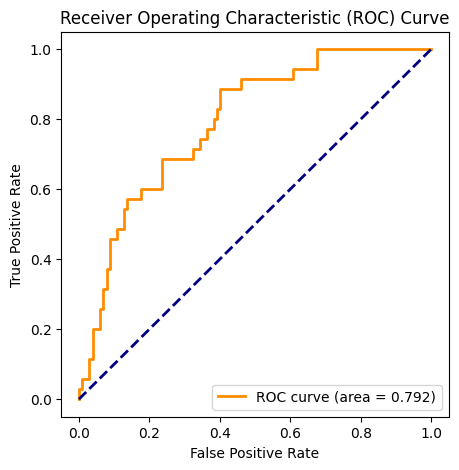

In [399]:
# Plot ROC Curve for Test data
fpr, tpr, _ = roc_curve(y_lr_test, lr_logreg_predprob_test[:,1])
plt.figure(figsize=(5, 5))
lw=2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.3f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Naïve Bayes Method (all variables)

In [400]:


# Create and fit the Gaussian Naive Bayes modelx
X_nb_train = X_lr_train
X_nb_test  = X_lr_test
y_nb_train = y_lr_train
y_nb_test  = y_lr_test

NBmodel = GaussianNB()

NBmodel.fit(X_nb_train, y_nb_train)

GaussianNB()

In [401]:
# Make predictions on the test set
nb_y_pred = NBmodel.predict(X_nb_test)
nb_predprob_test = NBmodel.predict_proba(X_nb_test)
nb_pred_test = np.where(nb_predprob_test[:,1] > threshold, 1, 0)

In [402]:
print(classification_report(y_nb_test,nb_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       102
           1       0.42      0.49      0.45        35

    accuracy                           0.70       137
   macro avg       0.62      0.63      0.62       137
weighted avg       0.71      0.70      0.71       137



In [403]:
auc_nb = roc_auc_score(y_nb_test, nb_predprob_test[:,1])
print('AUC: %.3f' % auc_nb)

AUC: 0.744


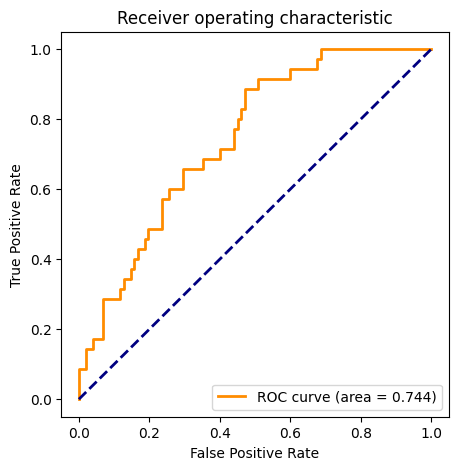

In [404]:
NBfpr, NBtpr, thresholds = roc_curve(y_nb_test, nb_predprob_test[:,1])

# plot the roc curve for Test data
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(NBfpr, NBtpr, color='darkorange',lw=lw, label='ROC curve (area = %0.3f)' % auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.axis('tight')
plt.xlabel('False Positive Rate');plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Note: The Logistic Regression method gives highest AUC for test data (0.79) when compared with Naive Bayes method (0.74)

## Implement binary logistic regression by combining service and product variables.

In [405]:
# Combine service and product variables
data['Recency_Total'] = data['Recency_Service'] + data['Recency_Product']
data['Bill_Total'] = data['Bill_Service'] + data['Bill_Product']

x_tot = ['Recency_Total', 'Bill_Total']
X_tot = data[x_tot]

# Split the data into training and testing sets
X_tot_train, X_tot_test, y_tot_train, y_tot_test = train_test_split(X_tot, y, test_size=0.2, random_state=42)

scaler_tot = StandardScaler()
scaler_tot.fit(X_tot_train)

X_tot_train = scaler_tot.transform(X_tot_train)
X_tot_test = scaler_tot.transform(X_tot_test)

### Logistic Regression

In [406]:
# Initialize the logistic regression model
lr_tot_model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
lr_tot_model = LogisticRegression(max_iter=1000).fit(X_tot_train, y_tot_train)

In [407]:
# Predict the class labels
lr_tot_y_pred = lr_tot_model.predict(X_tot_test)
lr_tot_predprob_test = lr_tot_model.predict_proba(X_tot_test)
lr_tot_pred_test = np.where(lr_tot_predprob_test[:,1] > threshold, 1, 0)
print(classification_report(y_tot_test,lr_tot_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77       102
           1       0.44      0.71      0.54        35

    accuracy                           0.69       137
   macro avg       0.66      0.70      0.66       137
weighted avg       0.76      0.69      0.71       137



In [408]:
auc_lr_tot = roc_auc_score(y_tot_test, lr_tot_predprob_test[:,1])
print('AUC: %.3f' % auc_lr_tot)

AUC: 0.788


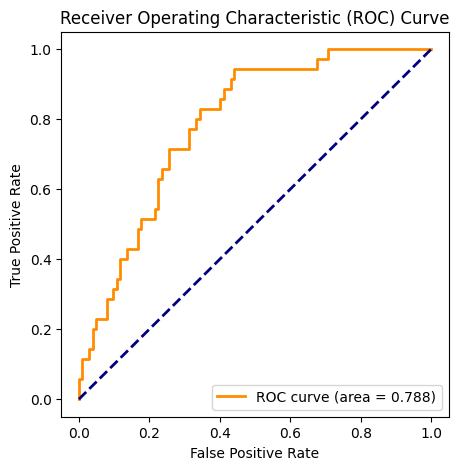

In [409]:
# Plot ROC Curve for Test data
fpr, tpr, _ = roc_curve(y_tot_test, lr_tot_predprob_test[:,1])
plt.figure(figsize=(5, 5))
lw=2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.3f)' % auc_lr_tot)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Support Vector Machines

In [410]:
svm_model = SVC(probability=True, random_state=0,kernel = 'linear')
svm_model.fit(X_tot_train, y_tot_train)

SVC(kernel='linear', probability=True, random_state=0)

In [411]:
svm_predprob_test = svm_model.predict_proba(X_tot_test)
svm_pred_test = np.where(svm_predprob_test[:,1] > threshold, 1, 0)
print(classification_report(y_tot_test,svm_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78       102
           1       0.45      0.71      0.56        35

    accuracy                           0.71       137
   macro avg       0.67      0.71      0.67       137
weighted avg       0.77      0.71      0.72       137



In [412]:
auc_svm = roc_auc_score(y_tot_test, svm_predprob_test[:,1])
print('AUC: %.3f' % auc_svm)

AUC: 0.794


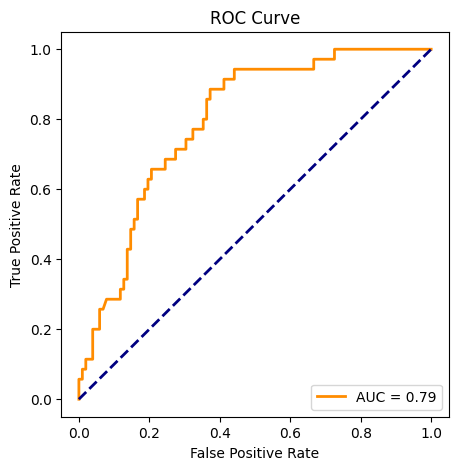

In [413]:
# Plot ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_tot_test, svm_predprob_test[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_svm:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Conclusion:
The SVM method gives highest AUC for test data ( 0.794) when compared with Logistic Regression and Naive Bayes method